In [154]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

#Updated donor file, new donors 2008 -2015
file = 'GAdata_bydonor2008_pipe.txt'

#error_bad_lines drops any record with extra delimiters
donors = pd.read_csv(file, sep='|', error_bad_lines=False, index_col='iContactID')


Skipping line 199174: expected 128 fields, saw 129

Skipping line 258189: expected 128 fields, saw 129

Skipping line 477846: expected 128 fields, saw 129

Skipping line 487703: expected 128 fields, saw 130

Skipping line 488292: expected 128 fields, saw 129
Skipping line 488638: expected 128 fields, saw 129

Skipping line 508883: expected 128 fields, saw 129

Skipping line 570933: expected 128 fields, saw 129

Skipping line 574103: expected 128 fields, saw 129
Skipping line 574984: expected 128 fields, saw 129

Skipping line 606825: expected 128 fields, saw 129

Skipping line 636228: expected 128 fields, saw 129

Skipping line 687399: expected 128 fields, saw 130

Skipping line 794761: expected 128 fields, saw 129

Skipping line 819196: expected 128 fields, saw 129

Skipping line 849668: expected 128 fields, saw 129

Skipping line 856968: expected 128 fields, saw 129

Skipping line 878954: expected 128 fields, saw 129

Skipping line 902640: expected 128 fields, saw 130
Skipping line 9

### DATA CLEANING


In [75]:
#drop bad records
donors = donors[donors.all_years_total >= 1]
low_dollar_donors = donors[(donors.avg_gift < 1000) & (donors.avg_gift > 0)]

In [72]:
#donors[(donors.all_years_total<0) | (donors.all_years_total>490)]
#donors.all_years_total.dtypes

#replace NaN values with 0
donors['all_years_total'] = donors.all_years_total.fillna(0)
donors['avg_gift'] = donors.avg_gift.fillna(0)

In [91]:
donors['mHPCFive'] = donors.mHPCFive.fillna(0)
donors['mHPCLT'] = donors.mHPCLT.fillna(0)
donors['all_years_total'] = donors.all_years_total.fillna(0)
donors['all_years_amt'] = donors.all_years_amt.fillna(0) 
donors['dtMRC_Year'] = donors.dtMRC_Year.fillna(0)
donors['dtFC_Year'] = donors.dtFC_Year.fillna(0)


### FEATURE ENGINEERING

In [155]:
#create new channel total count & amount variables

donors['all_years_total'] = donors.num_2008_gifts + donors.num_2009_gifts + donors.num_2010_gifts + donors.num_2011_gifts + donors.num_2012_gifts + donors.num_2013_gifts + donors.num_2014_gifts + donors.num_2015_gifts
donors['all_years_dm_total'] = donors.num_dm_2008_gifts + donors.num_dm_2009_gifts + donors.num_dm_2010_gifts + donors.num_dm_2011_gifts + donors.num_dm_2012_gifts + donors.num_dm_2013_gifts + donors.num_dm_2014_gifts + donors.num_dm_2015_gifts
donors['all_years_nm_total'] =  donors.num_nm_2008_gifts + donors.num_nm_2009_gifts + donors.num_nm_2010_gifts + donors.num_nm_2011_gifts + donors.num_nm_2012_gifts + donors.num_nm_2013_gifts + donors.num_nm_2014_gifts + donors.num_nm_2015_gifts
donors['all_years_st_total'] = donors.num_st_2008_gifts + donors.num_st_2009_gifts + donors.num_st_2010_gifts + donors.num_st_2011_gifts + donors.num_st_2012_gifts + donors.num_st_2013_gifts + donors.num_st_2014_gifts + donors.num_st_2015_gifts
donors['all_years_fi_total'] = donors.num_fi_2008_gifts + donors.num_fi_2009_gifts + donors.num_fi_2010_gifts + donors.num_fi_2011_gifts + donors.num_fi_2012_gifts + donors.num_fi_2013_gifts + donors.num_fi_2014_gifts + donors.num_fi_2015_gifts
donors['all_years_sp_total'] = donors.num_sp_2008_gifts + donors.num_sp_2009_gifts + donors.num_sp_2010_gifts + donors.num_sp_2011_gifts + donors.num_sp_2012_gifts + donors.num_sp_2013_gifts + donors.num_sp_2014_gifts + donors.num_sp_2015_gifts


donors['all_years_amt'] = donors.amt_2008_gifts + donors.amt_2009_gifts + donors.amt_2010_gifts + donors.amt_2011_gifts + donors.amt_2012_gifts + donors.amt_2013_gifts + donors.amt_2014_gifts + donors.amt_2015_gifts
donors['all_years_dm_amt'] = donors.amt_dm_2008_gifts + donors.amt_dm_2009_gifts + donors.amt_dm_2010_gifts + donors.amt_dm_2011_gifts + donors.amt_dm_2012_gifts + donors.amt_dm_2013_gifts + donors.amt_dm_2014_gifts + donors.amt_dm_2015_gifts
donors['all_years_nm_amt'] = donors.amt_nm_2008_gifts + donors.amt_nm_2009_gifts + donors.amt_nm_2010_gifts + donors.amt_nm_2011_gifts + donors.amt_nm_2012_gifts + donors.amt_nm_2013_gifts + donors.amt_nm_2014_gifts + donors.amt_nm_2015_gifts
donors['all_years_st_amt'] = donors.amt_st_2008_gifts + donors.amt_st_2009_gifts + donors.amt_st_2010_gifts + donors.amt_st_2011_gifts + donors.amt_st_2012_gifts + donors.amt_st_2013_gifts + donors.amt_st_2014_gifts + donors.amt_st_2015_gifts
donors['all_years_fi_amt'] = donors.amt_fi_2008_gifts + donors.amt_fi_2009_gifts + donors.amt_fi_2010_gifts + donors.amt_fi_2011_gifts + donors.amt_fi_2012_gifts + donors.amt_fi_2013_gifts + donors.amt_fi_2014_gifts + donors.amt_fi_2015_gifts
donors['all_years_sp_amt'] = donors.amt_sp_2008_gifts + donors.amt_sp_2009_gifts + donors.amt_sp_2010_gifts + donors.amt_sp_2011_gifts + donors.amt_sp_2012_gifts + donors.amt_sp_2013_gifts + donors.amt_sp_2014_gifts + donors.amt_sp_2015_gifts

In [156]:
#gift averages by channel - updating original data b/c pull may be incorrect

donors['avg_dm_gift'] = donors.all_years_dm_amt / donors.all_years_dm_total
donors['avg_nm_gift'] = donors.all_years_nm_amt / donors.all_years_nm_total
donors['avg_fi_gift'] = donors.all_years_fi_amt / donors.all_years_fi_total
donors['avg_sp_gift'] = donors.all_years_sp_amt / donors.all_years_sp_total
donors['avg_st_gift'] = donors.all_years_st_amt / donors.all_years_st_total

In [157]:
# prep for flags
donors['has_given'] = donors.all_years_total > 0
donors['dm_only'] = donors.all_years_total==donors.all_years_dm_total
donors['nm_only'] = donors.all_years_total==donors.all_years_nm_total
donors['store_ever'] = donors.all_years_st_total > 0
donors['online_ever'] = donors.all_years_nm_total > 0


#create channel-only donor flags

donors['dm_only_donor'] = donors.has_given & donors.dm_only
donors['nm_only_donor'] = donors.has_given & donors.nm_only
donors['store_ever_donor'] = donors.store_ever & donors.has_given
donors['online_ever_donor'] = donors.online_ever & donors.has_given

# cannot define--forgot to pull TM counts! 
# donors['tm_ever_donor']

In [158]:
#years of active giving
donors['active_2008'] = donors.num_2008_gifts > 0
donors['active_2009'] = donors.num_2009_gifts > 0 
donors['active_2010'] = donors.num_2010_gifts > 0
donors['active_2011'] = donors.num_2011_gifts > 0
donors['active_2012'] = donors.num_2012_gifts > 0
donors['active_2013'] = donors.num_2013_gifts > 0
donors['active_2014'] = donors.num_2014_gifts > 0
donors['active_2015'] = donors.num_2015_gifts > 0

#election year indicators
donors['any_election_year_donor'] = (donors.active_2008) | (donors.active_2010) | (donors.active_2012) | (donors.active_2014)
donors['election_year_total'] = donors.num_2008_gifts + donors.num_2010_gifts + donors.num_2012_gifts + donors.num_2014_gifts

donors['election_year_only_donor'] = donors.election_year_total == donors.all_years_total

In [160]:
donors['num_active_years'] = donors.active_2008.astype(float) + donors.active_2009.astype(float) + donors.active_2010.astype(float) + donors.active_2011.astype(float) + donors.active_2012.astype(float) + donors.active_2013.astype(float) + donors.active_2014.astype(float) + donors.active_2015.astype(float)


In [195]:
from datetime import datetime

#convert First Gift date to 3 values - year, month

donors.dtFC_Date = pd.to_datetime(donors.dtFC_Date, errors='coerce')
donors.dtFC_Date = donors.dtFC_Date.fillna(0)
donors['dtFC_Year'] = donors.dtFC_Date.dt.year.astype(int)
donors['dtFC_Month'] = donors.dtFC_Date.dt.month.astype(int)
donors['dtFC_diff'] = donors.dtFC_Date.map(lambda x: datetime.now() - x)

#create dummies for Month of First Gift
get_dummies(donors, columns = 'dtFC_Month', prefix='fc_month_')

#convert Recent gifts to year, month
donors.dtMRC_Date = pd.to_datetime(donors.dtMRC_Date, errors='coerce')
donors['dtMRC_Year']=donors.dtMRC_Date.dt.year.astype(float)
donors['dtMRC_Month'] = donors.dtMRC_Date.dt.month.astype(float)


In [83]:
#recast fields to appropriate types

#dtMRC_Date to date
donors['dtMRC_Date'] = pd.to_datetime(donors.dtMRC_Date, errors='coerce')

#convert sZip to float
donors['sZip'] = donors.sZip.astype('category')

#convert has_email to bool
donors['has_email'] = donors.has_email.astype('bool')

## Visualizations

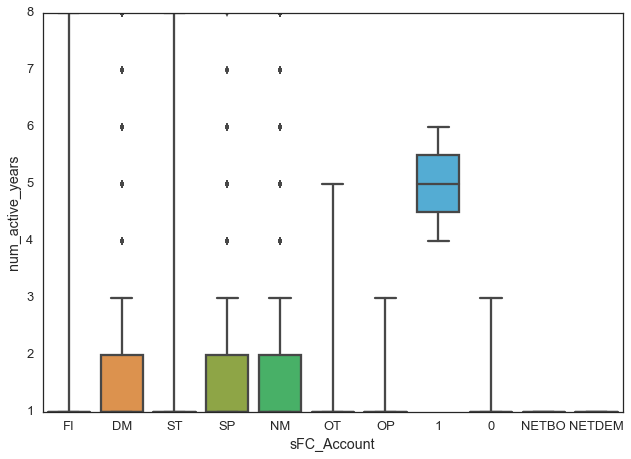

In [68]:
#graphing time!
sns.boxplot(data=donors, x='sFC_Account', y='num_active_years')

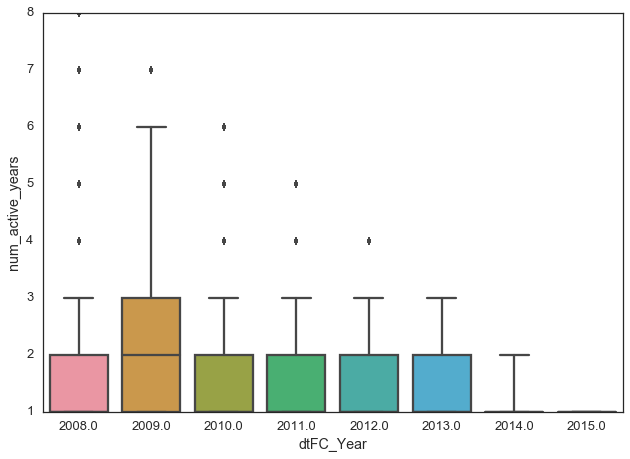

In [69]:
sns.boxplot(data=donors, x='dtFC_Year', y='num_active_years')

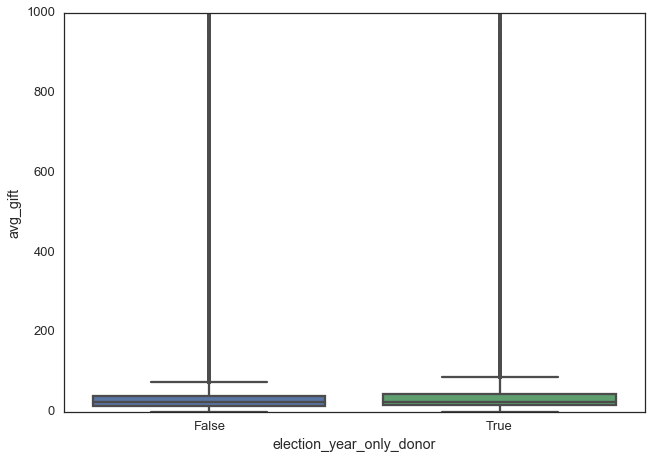

In [70]:
low_dollar_donors = donors[(donors.avg_gift < 1000) & (donors.avg_gift > 0)]
sns.boxplot(data=low_dollar_donors, x='election_year_only_donor', y='avg_gift')

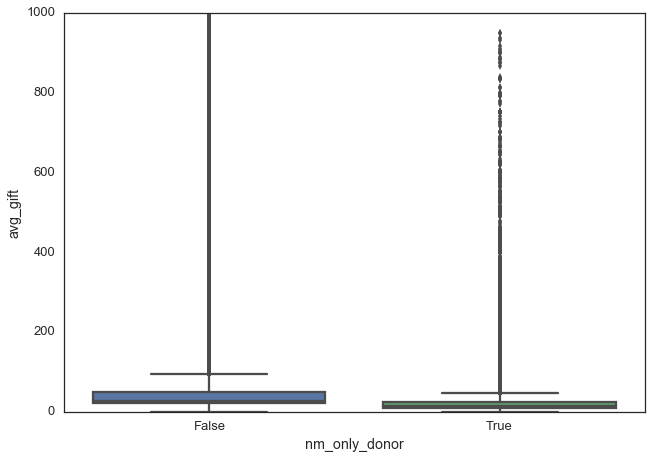

In [71]:
sns.boxplot(data=low_dollar_donors, x='nm_only_donor', y='avg_gift')

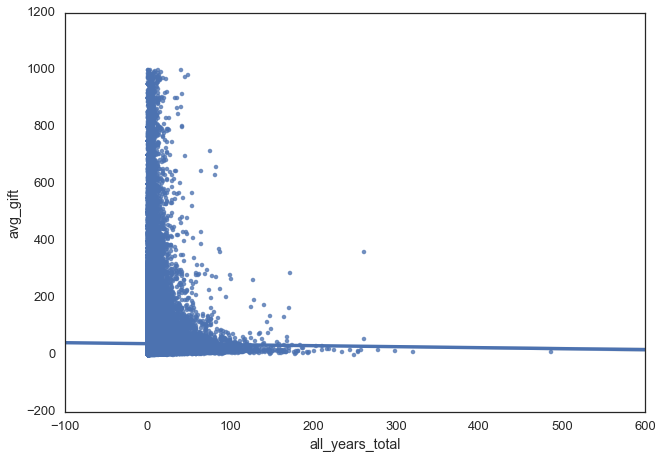

In [73]:
sns.regplot('all_years_total', 'avg_gift', low_dollar_donors)

In [74]:
donor_spotcheck = donors[['sZip','sEmployer','dtFC_Date', 'dtFC_Year', 'all_years_total', 'all_years_amt']]

donor_spotcheck[donor_spotcheck.all_years_total < 1]

,sZip,sEmployer,dtFC_Date,dtFC_Year,all_years_total,all_years_amt
iContactID,,,,,,
98075727,19606-8504,unemployed,NaT,NaN,0,NaN
98608028,18031-1479,none,NaT,NaN,0,NaN
98964664,08055-8415,none,NaT,NaN,0,NaN
99698298,20784-3515,Retired,NaT,NaN,0,NaN
98147963,76904-5305,Angelo State University,NaT,NaN,0,NaN
100099150,98144,microsoft,NaT,NaN,0,NaN
100522933,94062,Self,NaT,NaN,0,NaN
100522996,08534,QVC Inc.,NaT,NaN,0,NaN
100523000,70737,REalty Executives South Louisiana,NaT,NaN,0,NaN


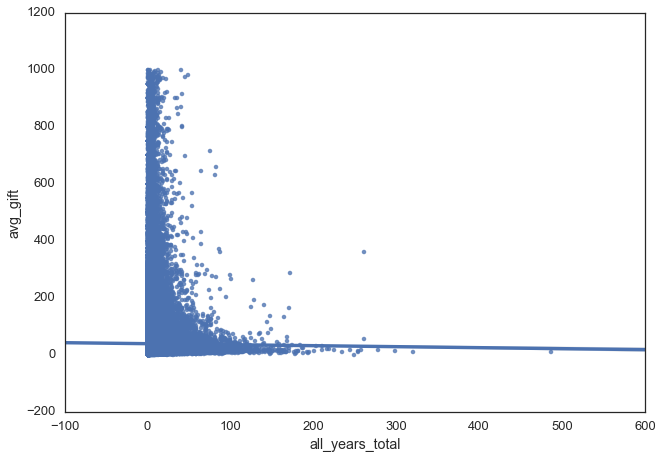

In [76]:
#re-plot
sns.regplot('all_years_total', 'avg_gift', low_dollar_donors)

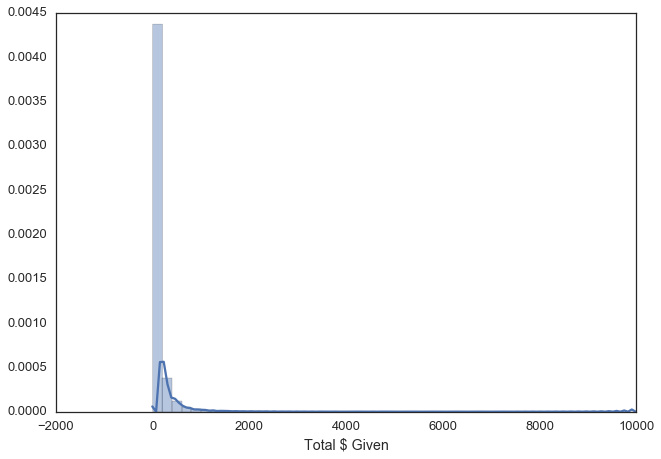

In [77]:
x = low_dollar_donors[low_dollar_donors.all_years_amt < 10000]

sns.distplot(x.all_years_amt, axlabel = 'Total $ Given')


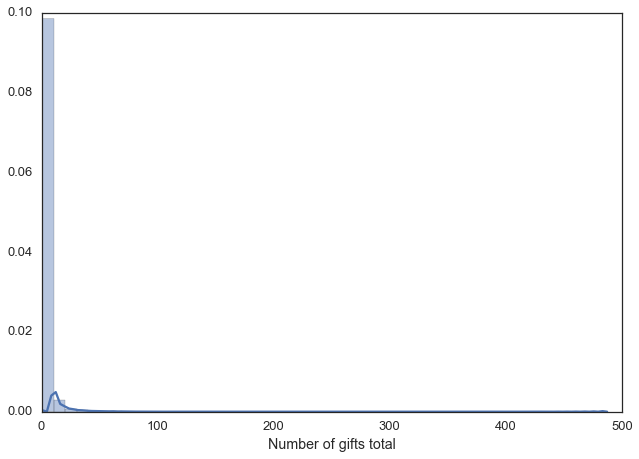

In [78]:
sns.distplot(x.all_years_total, axlabel = 'Number of gifts total')

In [79]:
donors[donors.all_years_total > 100]

,sCity,sState,sZip,sEmail,sEmployer,sOccupation,mHPCFive,mHPCLT,iNumLifetime,mSumLifetime,...,active_2011,active_2012,active_2013,active_2014,active_2015,any_election_year_donor,election_year_total,election_year_only_donor,num_active_years,dtFC_Year
iContactID,,,,,,,,,,,,,,,,,,,,,
42734373,Grand Rapids,MI,49508-4673,MCKVRI@EARTHLINK.NET,NaN,NaN,15.00,15.00,148,1327,...,False,True,True,True,True,True,110,False,6,2009
51328833,Knoxville,TN,37918-5038,cinman6488@bellsouth.net,UT Medical Center,Retired,100.00,100.00,119,2004,...,True,True,True,True,True,True,53,False,8,2008
97090436,Meadowlakes,TX,78654-7138,CLEUOORE@GMAIL.COM,Retired,Retired,1000.00,1000.00,149,13389,...,True,True,True,True,True,True,103,False,8,2008
97235180,Mount Sinai,NY,11766-1805,jenniferfidelo@aol.com,self,Nurse,100.00,100.00,216,4365.1,...,True,True,True,True,True,True,140,False,8,2008
97162050,Waxhaw,NC,28173-7499,beverlytatum@windstream.net,retired,Retired,50.00,50.00,117,2351.49,...,True,True,True,True,True,True,73,False,8,2008
97270353,Newnan,GA,30265-1231,THEGOODSTEINGROUP@ATT.NET,retired,Retired,55.00,55.00,102,1235,...,True,True,True,True,True,True,50,False,8,2008
97272620,Grapevine,TX,76051-6330,jerryvestal@gmail.com,Self,Pub Acct,150.00,150.00,104,3338,...,True,True,True,True,True,True,52,False,8,2008
97210100,Albertson,NY,11507-1433,JARRALCASTELL@YAHOO.COM,Retired,Retired,75.00,75.00,103,4125,...,True,True,True,True,True,True,56,False,8,2008
97360271,Winter Park,CO,80482-3285,AMABELLIB@MSN.COM,Retired,Retired,25.00,35.00,122,1659,...,True,True,True,True,True,True,77,False,8,2008


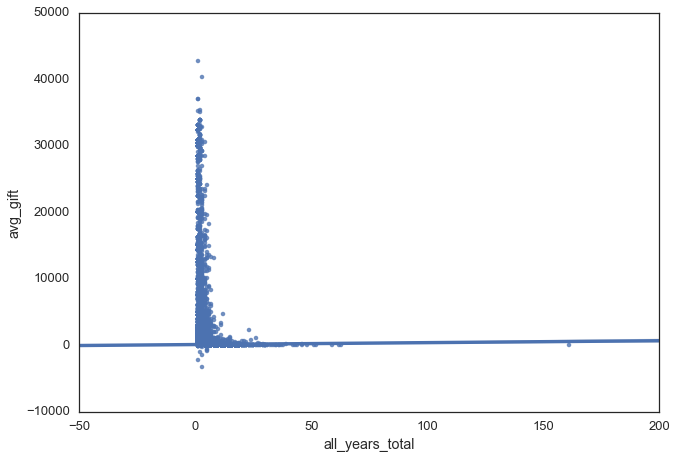

In [80]:
election_donors = donors[donors.election_year_only_donor == True]
sns.regplot('all_years_total', 'avg_gift', election_donors)

In [81]:
#REGRESSIONS: 
#Features, round 1: high-level stats and descriptives
#OUTCOME: # of years of active giving

features_one = ['mHPCFive', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtMRC_Date', 'dtFC_Date', 'sCity', 'sState', 'sZip', 'has_email', 'online_ever', 'store_ever']
X = donors[features_one]
y = donors.num_active_years

In [82]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
return np.sqrt(metrics.mean_squared_error(y_test, predict))

ValueError: invalid literal for float(): 98178-3973

In [ ]:
features_one = ['mHPCFive', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtMRC_Date', 'dtFC_Date', 'sCity', 'sState', 'sZip', 'has_email', 'online_ever', 'store_ever']
X = donors[features_one]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
return np.sqrt(metrics.mean_squared_error(y_test, predict))

In [ ]:
donors[features_one].dtypes

In [84]:
#remove hyphen from zipcode
donors['sZip']=donors.sZip.str.replace('-','')

In [ ]:
#drop city/state from features since non-numeric and captured in zip
features_one = ['mHPCFive', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtMRC_Date', 'dtFC_Date', 'sZip', 'has_email', 'online_ever', 'store_ever']
X = donors[features_one]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
return np.sqrt(metrics.mean_squared_error(y_test, predict))

In [85]:
check = ['sCity', 'sState', 'sZip']
donors[check][donors.sZip == 'not']

,sCity,sState,sZip
iContactID,,,
55407835,Montreal,NaN,not
62921838,Washington,DC,not
62943491,Washington,DC,not
88798457,Nassau,NaN,not
88843223,Ayase-Shi,NaN,not
91356279,Sittingbourne,NaN,not
89512697,Thornhill,NaN,not
90823060,Kaufman,TX,not
97094438,Georgetown,NaN,not


In [86]:
#international donors are irregular occurences, so will drop from the data
donors = donors[donors.sZip != 'not']

In [ ]:
#let's try this again
#drop city/state from features since non-numeric and captured in zip
features_one = ['mHPCFive', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtMRC_Date', 'dtFC_Date', 'sZip', 'has_email', 'online_ever', 'store_ever']
X = donors[features_one]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
return np.sqrt(metrics.mean_squared_error(y_test, predict))

In [132]:
donors[check][donors.sZip == 'V6G 1']

,sCity,sState,sZip
iContactID,,,


In [88]:
#some more attempts to clean sZip 
donors = donors[donors.sZip != 'V6G 1']
donors = donors[donors.sZip != ' ']
donors['sZip']=donors.sZip.str.replace(' ','')

In [ ]:
#donors['sZip'] = donors.sZip.fillna('0')

In [89]:
donors[donors.sZip == '0']

,sCity,sState,sZip,sEmail,sEmployer,sOccupation,mHPCFive,mHPCLT,iNumLifetime,mSumLifetime,...,active_2011,active_2012,active_2013,active_2014,active_2015,any_election_year_donor,election_year_total,election_year_only_donor,num_active_years,dtFC_Year
iContactID,,,,,,,,,,,,,,,,,,,,,


In [90]:
#turn datetime into string for model: 
donors.dtMRC_Date = pd.to_datetime(donors.dtMRC_Date, errors='coerce')
donors['dtMRC_Year']=donors.dtMRC_Date.dt.year.astype(float)


In [92]:
donors[features_one].dtypes

mHPCFive                  float64
mHPCLT                    float64
all_years_total           float64
all_years_amt             float64
dtMRC_Date         datetime64[ns]
dtFC_Date          datetime64[ns]
sCity                      object
sState                     object
sZip                       object
has_email                    bool
online_ever                  bool
store_ever                   bool
dtype: object

In [93]:
donors['sZip'] = donors.sZip.astype('string').fillna(0)

In [94]:
#create regional zip values -- first 2 digits of zipcode
donors['zip_region']=donors.sZip.str[:1]

In [110]:
donors.groupby('zip_region').mean()
#holy hell, drop Non-US zip codes (0-9 only)

,mHPCFive,mHPCLT,mMRC_Amount,num_2008_gifts,num_2009_gifts,num_2010_gifts,num_2011_gifts,num_2012_gifts,num_2013_gifts,num_2014_gifts,...,active_2012,active_2013,active_2014,active_2015,any_election_year_donor,election_year_total,election_year_only_donor,num_active_years,dtFC_Year,dtMRC_Year
zip_region,,,,,,,,,,,,,,,,,,,,,
,38.483607,38.688525,37.909836,0.000000,0.004098,0.000000,0.000000,1.012295,0.004098,0.000000,...,0.991803,0.004098,0.000000,0.004098,0.991803,1.012295,0.987705,1.004098,2011.991803,2012.004098
0,66.739611,130.023534,105.197092,0.399534,0.240128,0.532751,0.260063,0.388797,0.264763,0.383073,...,0.218898,0.141704,0.165243,0.139271,0.808207,1.704156,0.557499,1.573900,2010.241892,2011.114712
1,80.431030,144.531931,117.251780,0.357488,0.237159,0.510612,0.274657,0.445445,0.273552,0.383124,...,0.258708,0.147750,0.173938,0.151701,0.801911,1.696669,0.538898,1.607916,2009.986191,2010.898539
2,49.414090,93.235173,76.015790,0.377075,0.236833,0.549367,0.289940,0.440438,0.276120,0.389015,...,0.253368,0.149413,0.173678,0.144964,0.813254,1.755896,0.544498,1.637031,2010.015944,2010.972703
3,55.472543,94.153273,74.601142,0.308133,0.234672,0.502244,0.285795,0.479552,0.296844,0.419092,...,0.279260,0.161018,0.189631,0.169144,0.784663,1.709022,0.510784,1.632907,2009.546189,2010.498481
4,36.628034,60.461386,49.531086,0.293219,0.227110,0.513190,0.338377,0.514967,0.307270,0.427546,...,0.285452,0.158838,0.190006,0.161580,0.785843,1.748922,0.504501,1.645611,2010.167357,2011.116739
5,37.248897,64.562628,54.137860,0.323977,0.235549,0.513993,0.321158,0.472624,0.310747,0.432526,...,0.253481,0.161317,0.190199,0.182577,0.775606,1.743120,0.494759,1.655139,2009.916528,2010.874283
6,59.827702,111.159639,85.735818,0.339013,0.252142,0.548426,0.289980,0.445639,0.288385,0.415720,...,0.249147,0.152774,0.179307,0.148839,0.793930,1.748798,0.527647,1.614518,2010.121951,2011.043153
7,64.822347,102.906581,83.226791,0.276096,0.230213,0.514430,0.285948,0.486927,0.325910,0.475591,...,0.279371,0.169318,0.196714,0.172914,0.777353,1.753044,0.507011,1.604613,2010.757295,2011.667861


In [114]:
donors = donors[donors.zip_region.str.contains('[0-9]')]

In [115]:
#pleaseworkpleaseworkpleasework
from sklearn import metrics
import numpy as np

features_one = ['zip_region','mHPCFive', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']
X = donors[features_one]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predict))
#THIS WORKED FINALLY

0.488410125745


In [ ]:
#just checking...
donors[donors.num_active_years == 0]

In [116]:
#calculate null RMSE

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.1485326898059518

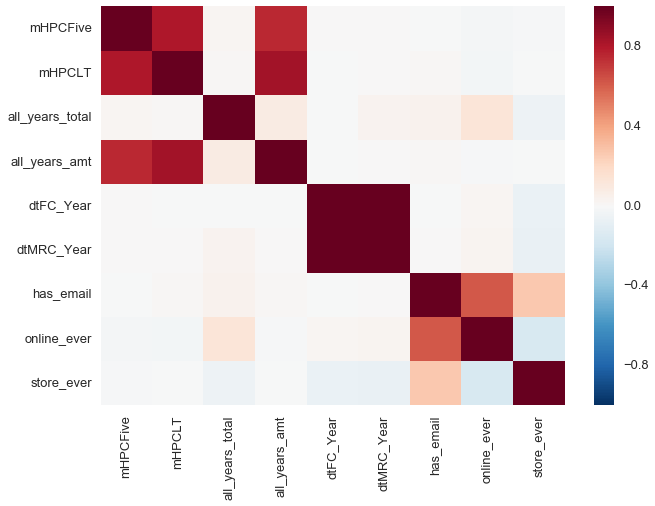

In [117]:
sns.heatmap(donors[features_one].corr())

In [119]:
features_hpc5 = ['zip_region','mHPCFive', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']
features_lt = ['zip_region', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']

X = donors[features_hpc5]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predict))


0.488654412853


In [120]:
X = donors[features_lt]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predict))
#no real difference between HPCLT only, 5 only, and combined. 5 only slightly better.

0.488409261224


In [129]:
features_two = ['active_2008', 'active_2009', 'active_2010', 'active_2011', 'active_2012', 'active_2013', 'active_2014', 'active_2015', 'num_2008_gifts', 'num_2009_gifts', 'num_2010_gifts', 'num_2011_gifts', 'num_2012_gifts', 'num_2013_gifts', 'num_2014_gifts', 'num_2015_gifts','zip_region','mHPCFive', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']

In [130]:
X = donors[features_two]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predict))

5.54279966803e-12


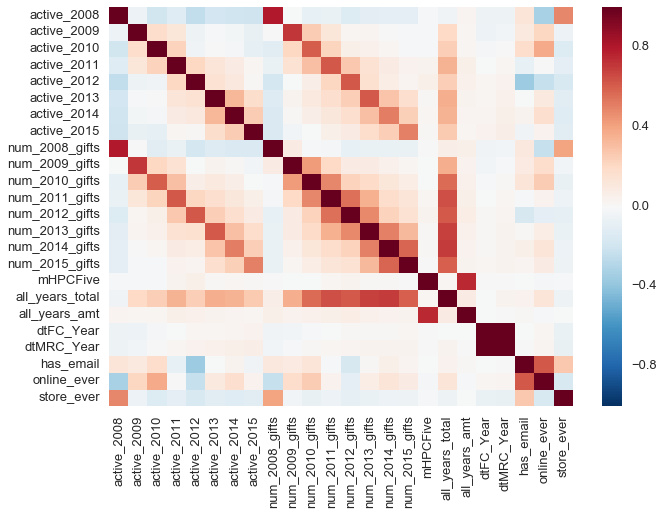

In [131]:
sns.heatmap(X.corr())

## The correlation heatmap suggests that a lot of the key variables are highly correlated. Can then guess that the regression (which is currently outperforming the null) may be overfitting. 

## Next step: Evaluate LinReg along with several other model types, using cross validation, to find the best performing model

In [139]:
#convert dtMRC_Date into year, month, and days since value


In [141]:
#set up features
cv_features = ['mHPCFive', 'all_years_total', 'all_years_amt', 'online_ever', 'nm_only', 'dm_only','has_email', 'election_year_only_donor', 'zip_region', 'sFC_Account', 'dtFC_Year', 'dtMRC_Date' ]
X = donors[cv_features]
y = donors.num_active_years

#scale dollar-value features to compensate for hi$ donors 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

TypeError: float() argument must be a string or a number

In [140]:
donors[cv_features].dtypes

mHPCFive                           float64
all_years_total                    float64
all_years_amt                      float64
online_ever                           bool
nm_only                               bool
dm_only                               bool
has_email                             bool
election_year_only_donor              bool
zip_region                          object
sFC_Account                         object
dtFC_Year                          float64
dtMRC_Date                  datetime64[ns]
dtype: object

In [ ]:
from sklearn.cross_validation import cross_val_score
#Run 10-fold Cross Val on regression model

linreg = LinearRegression()
scores = cross_val_score(linreg, X_scaled, y, cv=10, scoring='mean_squared_error')
print scores